In [0]:
#from google.colab import files
#import pandas as pd

#files.upload()
#df = pd.read_csv('test11.csv')

#%matplotlib inline

Считываю таблицу и создаю датасет

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
%matplotlib inline

test_data = pd.read_csv('5_OGE_2019.csv', index_col=0)

test_data

,Код ОО,Краткое наименование ОО,Вид ОО,Тип ОО,Выпускник,Код предмета,Предмет,Вариант,Часть В,1_Часть В,2_Часть В,3_Часть В,4_Часть В,5_Часть В,6_Часть В,7_Часть В,8_Часть В,9_Часть В,10_Часть В,11_Часть В,12_Часть В,13_Часть В,14_Часть В,15_Часть В,16_Часть В,17_Часть В,18_Часть В,Часть С,1_Часть С,2_Часть С,Часть D,Первичный балл,% Оценка,Оцека по 100,Оцека по 5
GIA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,201033,МБОУ СОШ № 3 с. Александров-Гай Александрово-Г...,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,5,Информатика,75657,-++++-+++++++++---,-,+,+,+,+,-,+,+,+,+,+,+,+,+,+,-,-,-,0(2)2(2),0,2,NaN,15,68,0,4
1,203063,МОУ - СОШ № 9 г. Аткарска Саратовской области,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,5,Информатика,73202,++++++++++++++++++,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,2(2)2(2),2,2,NaN,22,100,0,5
1,203063,МОУ - СОШ № 9 г. Аткарска Саратовской области,Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,5,Информатика,74018,++-++-++-+---+----,+,+,-,+,+,-,+,+,-,+,-,-,-,+,-,-,-,-,0(2)0(2),0,0,NaN,8,36,0,3
1,204023,"МБОУ ""СОШ № 2 р.п. Базарный-Карабулак""",Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,5,Информатика,74810,+++++++++-+-+-+-++,+,+,+,+,+,+,+,+,+,-,+,-,+,-,+,-,+,+,0(2)2(2),0,2,NaN,16,72,0,4
1,205015,МАОУ Гимназия № 1,Гимназия,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,5,Информатика,74810,++++++++-++-++++++,+,+,+,+,+,+,+,+,-,+,+,-,+,+,+,+,+,+,2(2)0(2),2,0,NaN,18,81,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,247053,"МОУ ""СОШ № 43""",Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,5,Информатика,80255,+-++++-+++--+++++-,+,-,+,+,+,+,-,+,+,+,-,-,+,+,+,+,+,-,1(2)0(2),1,0,NaN,14,63,0,4
1,247073,"МОУ ""СОШ № 83""",Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,5,Информатика,74018,+++++++++-+++++-++,+,+,+,+,+,+,+,+,+,-,+,+,+,+,+,-,+,+,0(2)1(2),0,1,NaN,17,77,0,4
1,247093,"МОУ ""СОШ № 106""",Средняя общеобразовательная школа,Общеобразовательное учреждение/организация,Выпускник общеобразовательной организации теку...,5,Информатика,74018,+++++++++-+++++-++,+,+,+,+,+,+,+,+,+,-,+,+,+,+,+,-,+,+,2(2)2(2),2,2,NaN,20,90,0,5


1. Общая статистика (количество, минимальный, максимальный, среднее, медиана, мода, среднеквадратическое отклонение).

Количество сдававших:
5986
Минимальный балл:
0
Максимальный балл:
100
Средний балл:
59.9492148346141
Медиана:
63.0
Мода:
0    59
dtype: int64
Среднеквадратическое отклонение:
24.58747214235015


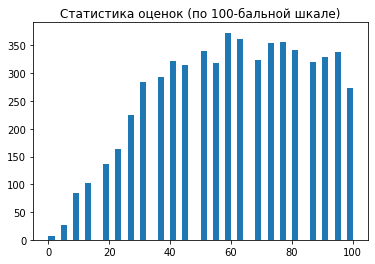

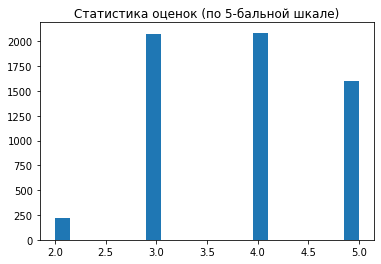

In [14]:
print("Количество сдававших:")
print(test_data["% Оценка"].count())
print("Минимальный балл:")
print(test_data["% Оценка"].min())
print("Максимальный балл:")
print(test_data["% Оценка"].max())
print("Средний балл:")
print(test_data["% Оценка"].mean())
print("Медиана:")
print(test_data["% Оценка"].median())
print("Мода:")
print(test_data["% Оценка"].mode())
print("Среднеквадратическое отклонение:")
print(test_data["% Оценка"].std())

plt.hist(test_data['% Оценка'], bins=50)
plt.title("Статистика оценок (по 100-бальной шкале)")
plt.show()
plt.hist(test_data['Оцека по 5'], bins=20)
plt.title("Статистика оценок (по 5-бальной шкале)")
plt.show()

2. Статистика количества сдававших и оценок по видам школ (СОШ, гимназия, лицей и т.д.), гистограмма.

Количество сдававших по виду ОО:
Средняя общеобразовательная школа                                                3858
Лицей                                                                             969
Гимназия                                                                          473
Средняя общеобразовательная школа с углубленным изучением отдельных предметов     293
Основная общеобразовательная школа                                                252
Лицей-интернат                                                                     91
Средняя общеобразовательная школа-интернат                                         29
Вечерняя (сменная) общеобразовательная школа                                       11
Кадетская школа-интернат                                                           10
Name: Вид ОО, dtype: int64


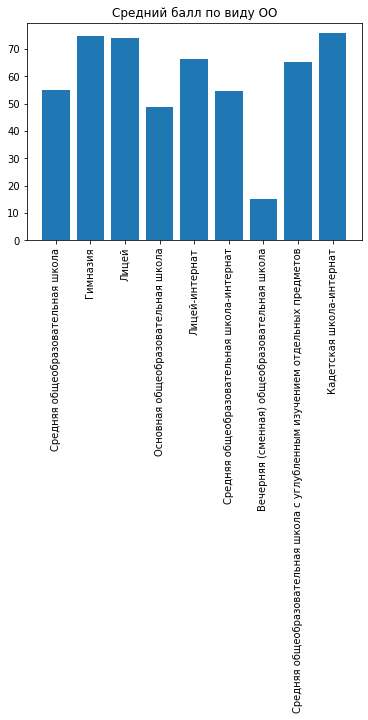

In [16]:
print("Количество сдававших по виду ОО:")
print(test_data["Вид ОО"].value_counts())

x = test_data['Вид ОО']
test_data['Среднее по виду школы'] = test_data.groupby(['Вид ОО'])['% Оценка'].transform('mean')
y = test_data['Среднее по виду школы']
plt.bar(x,y)
plt.xticks(rotation='vertical')
plt.title("Средний балл по виду ОО");
plt.show()

Считываю файла с кодами районов и создаю второй датасет


In [17]:
geo = pd.read_csv('geo.csv', index_col=0)

geo

,Район,Расстояние до Саратова
Код района,,
201,Алгайский,265
202,Аркадакский,239
203,Аткарский,106
204,Базарно-Карабулакский,103
205,Балаковский,163
206,Балашовский,211
207,Балтайский,138
208,Вольский,149
210,Дергачевский,224


3. Статистика количества сдававших и оценок по районам, гистограмма.

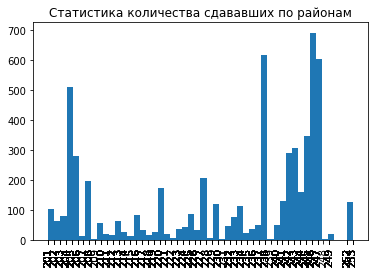

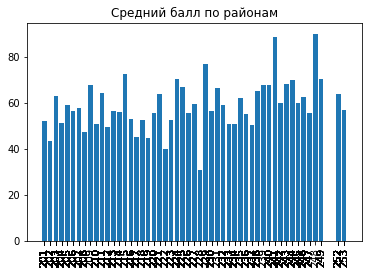

In [18]:
test_data["Код района"] = test_data["Код ОО"].map(lambda a: int(a // 1000))
plt.hist(test_data['Код района'], bins=50)
plt.title("Статистика количества сдававших по районам")
plt.xticks(rotation='vertical', ticks=test_data['Код района'])
plt.show()

x = test_data["Код района"]
test_data['Среднее по району'] = test_data.groupby(["Код района"])['% Оценка'].transform('mean')
y = test_data['Среднее по району']
plt.bar(x,y)
plt.xticks(rotation='vertical', ticks=test_data['Код района'])
plt.title("Средний балл по районам");
plt.show()

4. 10 лучших школ (не учитывать школы, из которых участвовало менее 10 учеников.

In [19]:
best_schools = test_data.groupby('Краткое наименование ОО')[['% Оценка']].mean().sort_values(by=['% Оценка'])
print(best_schools[-10:])

                                                     % Оценка
Краткое наименование ОО                                      
МОУ "СОШ ЗАТО Михайловский"                         90.000000
МОУ "СОШ" с. Рязанка                                90.000000
МАОУ ЛМИ                                            90.816327
МАОУ "Физико-технический лицей № 1"                 91.792453
МБОУ "СОШ с. Генеральское"                          95.000000
МОУ "ООШ с. Безымянное"                             95.000000
МОУ СОШ п. Прудовой                                 95.000000
МБОУ "СОШ с. Бутырки Лысогорского муниципальног...  95.000000
МОУ "Усть-Щербединская СОШ с. Усть-Щербедино Ро...  95.000000
МБОУ "ООШ с. Кучумбетово"                           98.333333


5. 10 худших школ.

In [20]:
print(best_schools[:10])

                                                     % Оценка
Краткое наименование ОО                                      
МБОУ "СОШ с. Семеновка" Аркадакского района Сар...   4.000000
МОУ "СОШ № 19 г.Вольска"                             9.750000
МОУ ВСОШ № 2 г. Балашова                            15.181818
МБОУ СОШ р.п. Ровное                                16.750000
МОУ "СОШ с.Камелик"                                 20.000000
МБОУ СОШ с.Сластуха                                 20.400000
МОУ "ООШ с. Покурлей"                               22.000000
МОУ "ООШ х. Малая Скатовка"                         27.000000
МОУ СОШ с. Барки Балашовского района                27.000000
МБОУ "СОШ № 19 с. Луганское"                        27.800000


6. Проверка гипотезы: зависимость результатов от удалённости от областного центра.

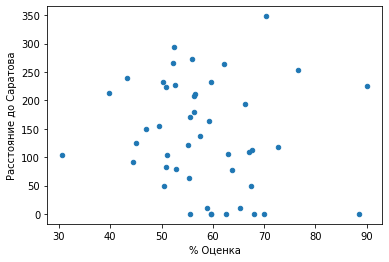

In [22]:
areas = test_data.groupby('Код района')[['% Оценка']].mean().sort_values(by=['% Оценка'])
temp_ds = pd.merge(areas, geo, how ='inner', on ='Код района') 
temp_ds[['% Оценка','Расстояние до Саратова']].plot(x='% Оценка', y='Расстояние до Саратова', kind = "scatter")
plt.show()